#รายชื่อสมาชิก
* 6509612781 นายณัฏฐพล โกเมศจามิกรณ์  หน้าที่ Data Preparation, ทำสไลด์
* 6509612971 นายปฏิพัทธ์ วงษ์เสงี่ยม  หน้าที่ Data visualization, ทำสไลด์
* 6509612989 นางสาวปณิดา กองมณี  หน้าที่ Data Preparation, ทำสไลด์, ทำ Model
* 6609650244 นางสาวชญาดา ธรรมวิชัย  หน้าที่ ทำ Model
* 6609650392 นายทัศน์พล พารา  หน้าที่ ทำ Model     
* 6609650582 นายภูมิภากร โกเมนไปรรินทร์  หน้าที่  ทำ Model, Data Preparation, ทำสไลด์
* 6609650608 นางสาวมนัสนันท์ อุดมรัตน์  หน้าที่  ทำ Model
* 6609650632 นางสาววรรณพร เทพชนะ  หน้าที่  ทำ Model  




#Sleep Health and Life-Style Dataset
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

#Load Libraries

In [ ]:
# Import libraries
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # แบ่ง training dataset and test set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor # Import the appropriate model
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns



#Data Acquisition

In [ ]:
#Connect to google drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Sleep Health and Life Style dataset
df_sleep = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,Nothing
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,Nothing
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75.0,10000,Nothing
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,NaN,3000,Sleep Apnea
4,5,Male,28,Nurse,5.9,4,30,8,Obese,NaN,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Engineer,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68.0,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,NaN,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,NaN,7000,Sleep Apnea


ข้อมูลคุณลักษณะ:
* Person ID: รหัสประจำตัวของแต่ละบุคคล
* Gender: เพศของแต่ละบุคคล
* Age(ปี): อายุของแต่ละบุคคล
* Occupation: อาชีพหรือวิชาชีพของบุคคล
* Sleep Duration (hours): จำนวนชั่วโมงที่บุคคลนั้นนอนหลับต่อวัน
* Quality of Sleep (scale: 1-10): การประเมินคุณภาพการนอนหลับโดยอัตนัย ตั้งแต่ 1 ถึง 10
* Physical Activity Level (minutes/day): จำนวนนาทีที่บุคคลนั้นทำกิจกรรมในแต่ละวัน
* Stress Level (scale: 1-10): การประเมินระดับความเครียด ตั้งแต่ 1 ถึง 10
* BMI Category: ดัชนีมวลกายของบุคคลนั้น (เช่น น้ำหนักน้อย ปกติ น้ำหนักเกิน)
* Heart Rate (bpm): อัตราการเต้นของหัวใจขณะพักผ่อนของบุคคลนั้นในหน่วยครั้งต่อนาที
* Daily Steps: จำนวนก้าวเดินที่บุคคลนั้นเดินในแต่ละวัน
* Sleep Disorder: อาการผิดปกติเกี่ยวกับการนอนหลับในตัวบุคคล (ไม่มี, นอนไม่หลับ, หยุดหายใจขณะหลับ )


#Data Preparation: Data Encoding
* Data encoding refers to the converting of categorical variables into numerical representations that can be understood by machine learning algorithms.

In [ ]:
#find unique values of all column.
for i in df_sleep.columns:
  print(f"{i}: {df_sleep[i].unique()}")

Person ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244

In [ ]:
# Replace "Normal" with "Normal Weight" in the 'BMI Category' column
df_sleep['BMI Category'] = df_sleep['BMI Category'].replace('Normal', 'Normal Weight')

# Print the updated DataFrame (optional)
df_sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77.0,4200,Nothing
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,75.0,10000,Nothing
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,75.0,10000,Nothing
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,NaN,3000,Sleep Apnea
4,5,Male,28,Nurse,5.9,4,30,8,Obese,NaN,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Engineer,8.1,9,75,3,Overweight,68.0,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68.0,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,NaN,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,NaN,7000,Sleep Apnea


In [ ]:
# Find unique valuesin each categorical column
for col in df_sleep.select_dtypes(include=['object']).columns:
  print(f"{col}: {df_sleep[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Nurse' 'Teacher'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal Weight' 'Obese']
Sleep Disorder: ['Nothing' 'Sleep Apnea' 'Insomnia']


In [ ]:
df_sleep['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df_sleep['Occupation'].replace({'Software Engineer':1, 'Doctor':2, 'Sales Representative':3, 'Teacher':4, 'Nurse':5,
 'Engineer':6,'Accountant':7, 'Scientist':8, 'Lawyer':9, 'Salesperson':10, 'Manager':11}, inplace=True)
df_sleep['BMI Category'].replace({'Normal Weight':1,'Overweight':2, 'Obese':3}, inplace=True)
df_sleep['Sleep Disorder'].replace({'Nothing':0,'Sleep Apnea':1, 'Insomnia':2 }, inplace=True)

/tmp/ipython-input-2764235260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sleep['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
/tmp/ipython-input-2764235260.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sleep['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
/t

In [ ]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int64  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int64  
 9   Heart Rate               320 non-null    float64
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 35.2 KB


#Data Preparation: Checking and Handling duplicate data

In [ ]:
#Drop column 'Person ID' for checking duplicated data
df_sleepdrop = df_sleep.drop('Person ID', axis=1)
df_sleepdrop

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,1,6.1,6,42,6,2,77.0,4200,0
1,0,28,2,6.2,6,60,8,1,75.0,10000,0
2,0,28,2,6.2,6,60,8,1,75.0,10000,0
3,0,28,3,5.9,4,30,8,3,NaN,3000,1
4,0,28,5,5.9,4,30,8,3,NaN,3000,1
...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,6,8.1,9,75,3,2,68.0,7000,1
370,1,59,5,8.0,9,75,3,2,68.0,7000,1
371,1,59,5,8.1,9,75,3,2,NaN,7000,1
372,1,59,5,8.1,9,75,3,2,NaN,7000,1


In [ ]:
#Check number of duplicate value
df_sleepdrop.duplicated().sum()

np.int64(200)

Explain
* ข้อมูลนี้มี duplicated values ทั้งหมด 200 ตัว

In [ ]:
#Cleaning Duplicate Data
df_sleepclean = df_sleepdrop.drop_duplicates()
df_sleepclean

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,1,6.1,6,42,6,2,77.0,4200,0
1,0,28,2,6.2,6,60,8,1,75.0,10000,0
3,0,28,3,5.9,4,30,8,3,NaN,3000,1
4,0,28,5,5.9,4,30,8,3,NaN,3000,1
5,0,28,1,5.9,4,30,8,3,85.0,3000,2
...,...,...,...,...,...,...,...,...,...,...,...
365,1,59,6,8.0,9,75,3,2,68.0,7000,1
366,1,59,5,8.1,9,75,3,2,68.0,7000,1
368,1,59,6,8.1,9,75,3,2,68.0,7000,1
371,1,59,5,8.1,9,75,3,2,NaN,7000,1


Explain
* หลังจาก drop duplicated values ทั้งหมดไปแล้ว จึงทำให้เหลือข้อมูลอยู่ทั้งหมด 174 ตัว

#Data Preparation:Checking and Handling Missing data

In [ ]:
#check for missing value
df_sleepclean.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,21
Daily Steps,0


Explain
* เกิด Missing value ในคอลัมน์ Heart Rate ทั้งหมด 21 ตัว

In [ ]:
#Remove rows with missing values in column 'Heart Rate'
df_sleepclean = df_sleepclean.dropna()

In [ ]:
df_sleepclean.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0


Explain
* ไม่มีข้อมูลที่เกิด Missing value

# EDA and Data Visualization

In [ ]:
df_sleepclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 368
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   153 non-null    int64  
 1   Age                      153 non-null    int64  
 2   Occupation               153 non-null    int64  
 3   Sleep Duration           153 non-null    float64
 4   Quality of Sleep         153 non-null    int64  
 5   Physical Activity Level  153 non-null    int64  
 6   Stress Level             153 non-null    int64  
 7   BMI Category             153 non-null    int64  
 8   Heart Rate               153 non-null    float64
 9   Daily Steps              153 non-null    int64  
 10  Sleep Disorder           153 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 14.3 KB


In [ ]:
for i in df_sleepclean.columns:
  print(f"{i}: {df_sleepclean[i].unique()}")

Gender: [0 1]
Age: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 59]
Occupation: [ 1  2  4  5  6  7  8  9 10 11]
Sleep Duration: [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 5.7 7.  6.7 7.3
 7.4 7.1 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Quality of Sleep: [6 4 7 5 8 9]
Physical Activity Level: [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Stress Level: [6 8 7 4 3 5]
BMI Category: [2 1 3]
Heart Rate: [77. 75. 85. 82. 70. 80. 78. 69. 72. 68. 76. 81. 65. 84. 74. 67. 73. 83.
 86.]
Daily Steps: [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]
Sleep Disorder: [0 2 1]


In [ ]:
# Get summary statistics of numerical variables
df_sleepclean.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.477124,40.777778,5.607843,7.054902,7.137255,56.274510,5.522876,1.470588,70.758170,6532.026144,0.673203
std,0.501117,8.509455,2.618847,0.758282,1.225061,19.824306,1.739952,0.574214,4.651013,1633.798190,0.833746
min,0.000000,27.000000,1.000000,5.700000,4.000000,30.000000,3.000000,1.000000,65.000000,3000.000000,0.000000
25%,0.000000,33.000000,4.000000,6.400000,6.000000,42.000000,4.000000,1.000000,68.000000,5000.000000,0.000000
50%,0.000000,39.000000,6.000000,7.100000,7.000000,60.000000,5.000000,1.000000,70.000000,6000.000000,0.000000
75%,1.000000,45.000000,7.000000,7.700000,8.000000,75.000000,7.000000,2.000000,72.000000,8000.000000,1.000000
max,1.000000,59.000000,11.000000,8.500000,9.000000,90.000000,8.000000,3.000000,86.000000,10000.000000,2.000000


Explain
* ค่าเฉลี่ยของอายุ เท่ากับ 40.77 ปี
* ค่าเฉลี่ยของระยะเวลาในการนอนหลับ เท่ากับ 7.0549 ชั่วโมง
* ค่าเฉลี่ยของคุณภาพการนอน เท่ากับ 7.137 คะแนน
* ค่าเฉลี่ยของจำนวนนาทีที่ทำกิจกรรมในแต่ละวัน เท่ากับ 56.27 นาที/วัน.
* ค่าเฉลี่ยของระดับความเครียด	เท่ากับ 5.522 คะแนน
* ค่าเฉลี่ยของดัชนีมวลกาย เท่ากับ 1.4705
* ค่าเฉลี่ยของอัตราการเต้นของหัวใจ เท่ากับ 70.76 ครั้ง/นาที
* ค่าเฉลี่ยของจำนวนก้าวที่เดินในแต่ละวัน เท่ากับ 6532.0261 ก้าว/วัน
* ค่าเฉลี่ยของอาการผิดปกติจากการนอนหลับ เท่ากับ  0.6732 คะแนน

<Axes: xlabel='Quality of Sleep', ylabel='count'>

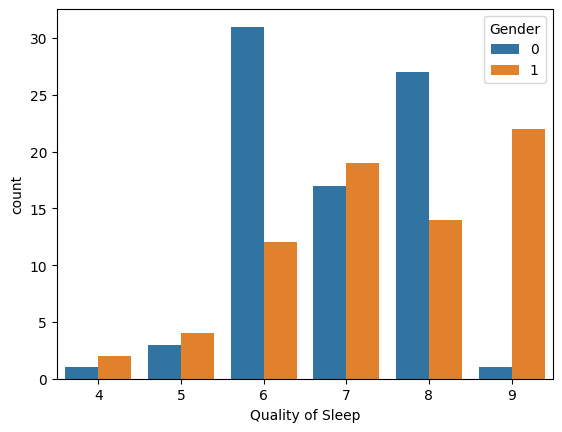

In [ ]:
#plot graph shows the frequency distribution between Quality of Sleep and Gender
sns.countplot(data=df_sleepclean, x='Quality of Sleep', hue='Gender')

Explain
* จากกราฟแสดงให้เห็นว่า เพศชายมีคุณภาพในการนอน (Quality of Sleep) สูงกว่าเมื่อเทียบกับเพศหญิง

In [ ]:
# Using function groupby to calculate frequecy
df_sleepclean.groupby(['Gender','Quality of Sleep'])['Quality of Sleep'].count()

Gender  Quality of Sleep
0       4                    1
        5                    3
        6                   31
        7                   17
        8                   27
        9                    1
1       4                    2
        5                    4
        6                   12
        7                   19
        8                   14
        9                   22
Name: Quality of Sleep, dtype: int64

In [ ]:
# Using function groupby to calculate percentage
df_sleepclean.groupby(['Gender','Quality of Sleep'])['Quality of Sleep'].count() / df_sleepclean.groupby(['Gender'])['Quality of Sleep'].count()

Gender  Quality of Sleep
0       4                   0.012500
        5                   0.037500
        6                   0.387500
        7                   0.212500
        8                   0.337500
        9                   0.012500
1       4                   0.027397
        5                   0.054795
        6                   0.164384
        7                   0.260274
        8                   0.191781
        9                   0.301370
Name: Quality of Sleep, dtype: float64

Explain
* คุณภาพในการนอน (Quality of Sleep) ของเพศชายสูงสุดอยู่ที่ระดับที่ 6 คิดเป็น 38.75 %. (31 คน)
* คุณภาพการนอน (Quality of Sleep) ของเพศหญิงสูงสุดอยู่ที่ระดับที่ 9 คิดเป็น 30.137 %. (22 คน)

In [ ]:
# Find correlation score
df_sleepclean.corr()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
Gender,1.000000,0.524902,0.023198,0.127985,0.235557,0.031762,-0.401186,0.197703,-0.161874,0.010945,0.155201
Age,0.524902,1.000000,0.230468,0.388020,0.498988,0.256355,-0.459548,0.391809,-0.272486,0.125964,0.235432
Occupation,0.023198,0.230468,1.000000,0.093406,0.185040,0.088511,-0.159725,0.053529,-0.081835,0.051543,0.106640
Sleep Duration,0.127985,0.388020,0.093406,1.000000,0.855862,0.381147,-0.796291,-0.241042,-0.455665,0.114285,-0.264888
Quality of Sleep,0.235557,0.498988,0.185040,0.855862,1.000000,0.367126,-0.870323,-0.251416,-0.624576,0.204871,-0.290737
Physical Activity Level,0.031762,0.256355,0.088511,0.381147,0.367126,1.000000,-0.210178,0.023832,-0.017328,0.717524,-0.114346
Stress Level,-0.401186,-0.459548,-0.159725,-0.796291,-0.870323,-0.210178,1.000000,0.055003,0.596185,0.020222,0.114029
BMI Category,0.197703,0.391809,0.053529,-0.241042,-0.251416,0.023832,0.055003,1.000000,0.449354,-0.258809,0.556954
Heart Rate,-0.161874,-0.272486,-0.081835,-0.455665,-0.624576,-0.017328,0.596185,0.449354,1.000000,-0.282086,0.208524
Daily Steps,0.010945,0.125964,0.051543,0.114285,0.204871,0.717524,0.020222,-0.258809,-0.282086,1.000000,-0.195115


Explain
* ตัวแปร Age , Sleep Duration มีความสัมพันธ์ในทิศทางบวกกับตัวแปร Quality of Sleep ซึ่งมีค่าเท่ากับ 0.4990 , 0.8559 ตามลำดับ
* ตัวแปร Stress Level มีความสัมพันธ์ในทิศทางลบกับตัวแปร Quality of Sleep ซึ่งมีค่าเท่ากับ -0.8703

<Axes: >

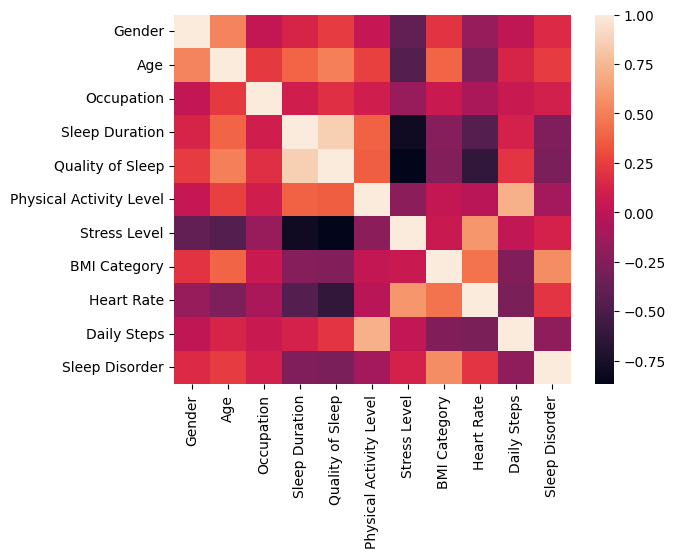

In [ ]:
sns.heatmap(df_sleepclean.corr())

Explain
* ตัวแปร Age และ Sleep Duration มีความสัมพันธ์กับตัวแปร Quality of Sleep ในทิศทางบวก
* ตัวแปร Stress Level มีความสัมพันธ์กับตัวแปร Quality of Sleep ในทิศทางลบ

# Classification Model

---



# Supervised Learning



# Random Forest Model


In [ ]:
# We will predict Quality of Sleep in column "Quality of Sleep"
X =df_sleepclean.drop('Quality of Sleep', axis=1)
y = df_sleepclean['Quality of Sleep']

In [ ]:
X

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,1,6.1,42,6,2,77.0,4200,0
1,0,28,2,6.2,60,8,1,75.0,10000,0
5,0,28,1,5.9,30,8,3,85.0,3000,2
6,0,29,4,6.3,40,7,3,82.0,3500,2
10,0,29,2,6.1,30,8,1,70.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
362,1,59,6,8.2,75,3,2,68.0,7000,1
364,1,59,5,8.0,75,3,2,68.0,7000,1
365,1,59,6,8.0,75,3,2,68.0,7000,1
366,1,59,5,8.1,75,3,2,68.0,7000,1


In [ ]:
y

,Quality of Sleep
0,6
1,6
5,4
6,6
10,6
...,...
362,9
364,9
365,9
366,9


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
203,0,43,6,6.9,47,7,1,69.0,6800,0
145,1,38,9,7.4,60,5,3,84.0,3300,1
49,0,31,5,7.7,75,6,1,70.0,8000,1
86,0,35,6,7.2,60,4,1,65.0,5000,0
157,0,39,9,7.3,60,5,1,68.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
148,1,39,9,6.9,50,6,1,75.0,5500,0
249,0,44,10,6.5,45,7,2,72.0,6000,0
30,1,30,5,6.4,35,7,1,78.0,4100,1
196,0,43,10,6.8,45,7,2,72.0,6000,2


In [ ]:
y_train

,Quality of Sleep
203,6
145,7
49,7
86,8
157,8
...,...
148,7
249,6
30,5
196,6


In [ ]:
X_test

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
177,0,42,10,6.5,45,7,2,72.0,6000,2
184,1,42,4,6.8,45,7,2,78.0,5000,1
209,0,43,6,7.8,90,5,1,70.0,8000,0
261,1,45,4,7.2,45,4,2,65.0,6000,0
67,0,33,2,6.0,30,8,1,72.0,5000,2
260,1,45,6,7.1,45,4,2,65.0,6000,2
163,0,40,9,7.9,90,5,1,68.0,8000,0
167,0,41,9,7.1,55,6,2,72.0,6000,0
34,0,31,2,7.7,75,6,1,70.0,8000,0
31,1,30,5,6.4,35,7,1,78.0,4100,2


In [ ]:
y_test

,Quality of Sleep
177,6
184,6
209,8
261,7
67,6
260,7
163,8
167,7
34,7
31,5


In [ ]:
#  Train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([6, 7, 8, 7, 6, 7, 8, 8, 7, 5, 7, 7, 5, 7, 8, 8, 7, 9, 8, 8, 8, 9,
       6, 8, 5, 6, 7, 6, 9, 6, 7])

In [ ]:
y_test

,Quality of Sleep
177,6
184,6
209,8
261,7
67,6
260,7
163,8
167,7
34,7
31,5


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9354838709677419
Confusion Matrix:
[[3 0 0 0 0]
 [0 6 1 0 0]
 [0 0 9 1 0]
 [0 0 0 8 0]
 [0 0 0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         3
           6       1.00      0.86      0.92         7
           7       0.90      0.90      0.90        10
           8       0.89      1.00      0.94         8
           9       1.00      1.00      1.00         3

    accuracy                           0.94        31
   macro avg       0.96      0.95      0.95        31
weighted avg       0.94      0.94      0.94        31



Explain
* Accuracy ของ Random Forest Model เท่ากับ 0.9355
* Precision ของ Quality of Sleep ระดับที่ 5 เท่ากับ 1.00
* Precision ของ Quality of Sleep ระดับที่ 6 เท่ากับ 1.00
* Precision ของ Quality of Sleep ระดับที่ 7 เท่ากับ 0.83
* Precision ของ Quality of Sleep ระดับที่ 8 เท่ากับ 1.00
* Precision ของ Quality of Sleep ระดับที่ 9 เท่ากับ 1.00
* Recall ของ Quality of Sleep ระดับที่ 5 เท่ากับ 1.00
* Recall ของ Quality of Sleep ระดับที่ 6 เท่ากับ 0.71
* Recall ของ Quality of Sleep ระดับที่ 7 เท่ากับ 1.00
* Recall ของ Quality of Sleep ระดับที่ 8 เท่ากับ 1.00
* Recall ของ Quality of Sleep ระดับที่ 9 เท่ากับ 1.00

In [ ]:
conf_matrix

array([[3, 0, 0, 0, 0],
       [0, 6, 1, 0, 0],
       [0, 0, 9, 1, 0],
       [0, 0, 0, 8, 0],
       [0, 0, 0, 0, 3]])

In [ ]:
# Visualize confusion matrix
# Hint: using ConfusionMatrixDisplay function from scikit-learn metrics module
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix )

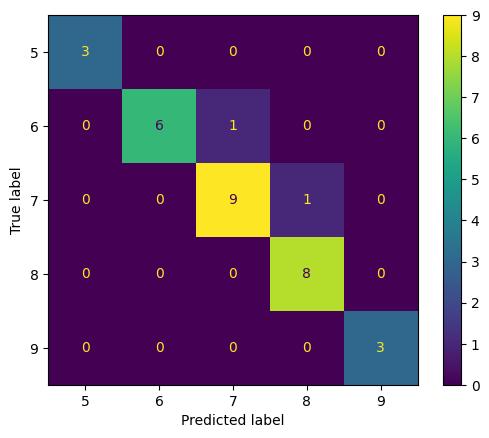

In [ ]:
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=['5', '6', '7', '8', '9'])
conf_matrix_display.plot()
plt.show()

Explain
* โมเดลทำนาย Quality of Sleepระดับที่ 5 ถูกต้องทั้งหมด 3 คน และ โมเดลทำนายไม่ถูกต้อง 0 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 6 ถูกต้องทั้งหมด 6 คน และ โมเดลทำนายไม่ถูกต้อง 1 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 7 ถูกต้องทั้งหมด 9 คน และ โมเดลทำนายไม่ถูกต้อง 1 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 8 ถูกต้องทั้งหมด 8 คน และ โมเดลทำนายไม่ถูกต้อง 0 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 9 ถูกต้องทั้งหมด 3 คน และ โมเดลทำนายไม่ถูกต้อง 0 คน



#Decision Tree Model

In [ ]:
X = df_sleepclean.drop('Quality of Sleep', axis=1)
y = df_sleepclean['Quality of Sleep']

In [ ]:
X

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,1,6.1,42,6,2,77.0,4200,0
1,0,28,2,6.2,60,8,1,75.0,10000,0
5,0,28,1,5.9,30,8,3,85.0,3000,2
6,0,29,4,6.3,40,7,3,82.0,3500,2
10,0,29,2,6.1,30,8,1,70.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
362,1,59,6,8.2,75,3,2,68.0,7000,1
364,1,59,5,8.0,75,3,2,68.0,7000,1
365,1,59,6,8.0,75,3,2,68.0,7000,1
366,1,59,5,8.1,75,3,2,68.0,7000,1


In [ ]:
y

,Quality of Sleep
0,6
1,6
5,4
6,6
10,6
...,...
362,9
364,9
365,9
366,9


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
203,0,43,6,6.9,47,7,1,69.0,6800,0
145,1,38,9,7.4,60,5,3,84.0,3300,1
49,0,31,5,7.7,75,6,1,70.0,8000,1
86,0,35,6,7.2,60,4,1,65.0,5000,0
157,0,39,9,7.3,60,5,1,68.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
148,1,39,9,6.9,50,6,1,75.0,5500,0
249,0,44,10,6.5,45,7,2,72.0,6000,0
30,1,30,5,6.4,35,7,1,78.0,4100,1
196,0,43,10,6.8,45,7,2,72.0,6000,2


In [ ]:
y_train

,Quality of Sleep
203,6
145,7
49,7
86,8
157,8
...,...
148,7
249,6
30,5
196,6


In [ ]:
X_test

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
177,0,42,10,6.5,45,7,2,72.0,6000,2
184,1,42,4,6.8,45,7,2,78.0,5000,1
209,0,43,6,7.8,90,5,1,70.0,8000,0
261,1,45,4,7.2,45,4,2,65.0,6000,0
67,0,33,2,6.0,30,8,1,72.0,5000,2
260,1,45,6,7.1,45,4,2,65.0,6000,2
163,0,40,9,7.9,90,5,1,68.0,8000,0
167,0,41,9,7.1,55,6,2,72.0,6000,0
34,0,31,2,7.7,75,6,1,70.0,8000,0
31,1,30,5,6.4,35,7,1,78.0,4100,2


In [ ]:
y_test

,Quality of Sleep
177,6
184,6
209,8
261,7
67,6
260,7
163,8
167,7
34,7
31,5


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
y_pred

array([6., 7., 8., 8., 6., 8., 8., 8., 7., 5., 7., 7., 5., 5., 8., 8., 7.,
       9., 8., 8., 8., 9., 6., 8., 5., 6., 7., 6., 9., 6., 8.])

In [ ]:
y_test

,Quality of Sleep
177,6
184,6
209,8
261,7
67,6
260,7
163,8
167,7
34,7
31,5


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8064516129032258
Confusion Matrix:
[[3 0 0 0 0]
 [0 6 1 0 0]
 [1 0 5 4 0]
 [0 0 0 8 0]
 [0 0 0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           5       0.75      1.00      0.86         3
           6       1.00      0.86      0.92         7
           7       0.83      0.50      0.62        10
           8       0.67      1.00      0.80         8
           9       1.00      1.00      1.00         3

    accuracy                           0.81        31
   macro avg       0.85      0.87      0.84        31
weighted avg       0.84      0.81      0.80        31



Explain
* Accuracy ของ Decision Tree Model เท่ากับ 0.8387
* Precision ของ Quality of Sleep ระดับที่ 5 เท่ากับ 0.75
* Precision ของ Quality of Sleep ระดับที่ 6 เท่ากับ 1.00
* Precision ของ Quality of Sleep ระดับที่ 7 เท่ากับ 0.86
* Precision ของ Quality of Sleep ระดับที่ 8 เท่ากับ 0.73
* Precision ของ Quality of Sleep ระดับที่ 9 เท่ากับ 1.00
* Recall ของ Quality of Sleep ระดับที่ 5 เท่ากับ 1.00
* Recall ของ Quality of Sleep ระดับที่ 6 เท่ากับ 0.86
* Recall ของ Quality of Sleep ระดับที่ 7 เท่ากับ 0.60
* Recall ของ Quality of Sleep ระดับที่ 8 เท่ากับ 1.00
* Recall ของ Quality of Sleep ระดับที่ 9 เท่ากับ 1.00

In [ ]:
conf_matrix

array([[3, 0, 0, 0, 0],
       [0, 6, 1, 0, 0],
       [1, 0, 5, 4, 0],
       [0, 0, 0, 8, 0],
       [0, 0, 0, 0, 3]])

In [ ]:
# Visualize confusion matrix
# Hint: using ConfusionMatrixDisplay function from scikit-learn metrics module
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix )

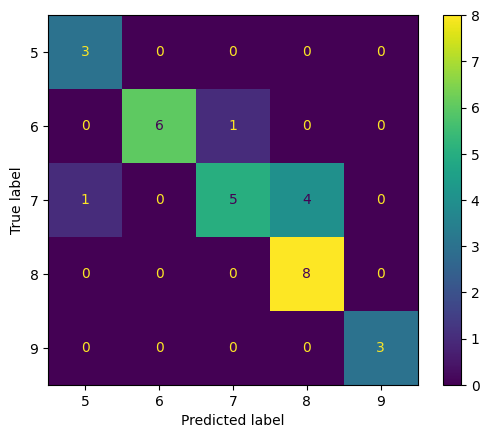

In [ ]:
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=['5', '6', '7', '8','9'])
conf_matrix_display.plot()
plt.show()

Explain
* โมเดลทำนาย Quality of Sleepระดับที่ 5 ถูกต้องทั้งหมด 3 คน และ โมเดลทำนายไม่ถูกต้อง 1 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 6 ถูกต้องทั้งหมด 6 คน และ โมเดลทำนายไม่ถูกต้อง 1 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 7 ถูกต้องทั้งหมด 5 คน และ โมเดลทำนายไม่ถูกต้อง 5 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 8 ถูกต้องทั้งหมด 8 คน และ โมเดลทำนายไม่ถูกต้อง 0 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 9 ถูกต้องทั้งหมด 3 คน และ โมเดลทำนายไม่ถูกต้อง 0 คน

#Support Vector Machine Model (SVM)

In [ ]:
#Predict Quality of Sleep in ['Quality of Sleep']
X = df_sleepclean.drop('Quality of Sleep', axis=1)
y = df_sleepclean['Quality of Sleep']

In [ ]:
X

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,1,6.1,42,6,2,77.0,4200,0
1,0,28,2,6.2,60,8,1,75.0,10000,0
5,0,28,1,5.9,30,8,3,85.0,3000,2
6,0,29,4,6.3,40,7,3,82.0,3500,2
10,0,29,2,6.1,30,8,1,70.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
362,1,59,6,8.2,75,3,2,68.0,7000,1
364,1,59,5,8.0,75,3,2,68.0,7000,1
365,1,59,6,8.0,75,3,2,68.0,7000,1
366,1,59,5,8.1,75,3,2,68.0,7000,1


In [ ]:
y

,Quality of Sleep
0,6
1,6
5,4
6,6
10,6
...,...
362,9
364,9
365,9
366,9


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
203,0,43,6,6.9,47,7,1,69.0,6800,0
145,1,38,9,7.4,60,5,3,84.0,3300,1
49,0,31,5,7.7,75,6,1,70.0,8000,1
86,0,35,6,7.2,60,4,1,65.0,5000,0
157,0,39,9,7.3,60,5,1,68.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
148,1,39,9,6.9,50,6,1,75.0,5500,0
249,0,44,10,6.5,45,7,2,72.0,6000,0
30,1,30,5,6.4,35,7,1,78.0,4100,1
196,0,43,10,6.8,45,7,2,72.0,6000,2


In [ ]:
y_train

,Quality of Sleep
203,6
145,7
49,7
86,8
157,8
...,...
148,7
249,6
30,5
196,6


In [ ]:
X_test

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
177,0,42,10,6.5,45,7,2,72.0,6000,2
184,1,42,4,6.8,45,7,2,78.0,5000,1
209,0,43,6,7.8,90,5,1,70.0,8000,0
261,1,45,4,7.2,45,4,2,65.0,6000,0
67,0,33,2,6.0,30,8,1,72.0,5000,2
260,1,45,6,7.1,45,4,2,65.0,6000,2
163,0,40,9,7.9,90,5,1,68.0,8000,0
167,0,41,9,7.1,55,6,2,72.0,6000,0
34,0,31,2,7.7,75,6,1,70.0,8000,0
31,1,30,5,6.4,35,7,1,78.0,4100,2


In [ ]:
y_test

,Quality of Sleep
177,6
184,6
209,8
261,7
67,6
260,7
163,8
167,7
34,7
31,5


In [ ]:
#  Train the Random Forest Classifier
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

In [ ]:
y_pred

array([6, 6, 8, 6, 6, 6, 8, 6, 8, 6, 8, 8, 6, 6, 8, 8, 6, 6, 8, 8, 8, 6,
       6, 8, 6, 6, 8, 8, 6, 6, 6])

In [ ]:
y_test

,Quality of Sleep
177,6
184,6
209,8
261,7
67,6
260,7
163,8
167,7
34,7
31,5


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.45161290322580644
Confusion Matrix:
[[0 3 0 0 0]
 [0 6 0 1 0]
 [0 6 0 4 0]
 [0 0 0 8 0]
 [0 3 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         3
           6       0.33      0.86      0.48         7
           7       0.00      0.00      0.00        10
           8       0.62      1.00      0.76         8
           9       0.00      0.00      0.00         3

    accuracy                           0.45        31
   macro avg       0.19      0.37      0.25        31
weighted avg       0.23      0.45      0.31        31



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Explain
* Accuracy ของ SVM Model เท่ากับ 0.4516
* Precision ของ Quality of Sleep ระดับที่ 5 เท่ากับ 0.00
* Precision ของ Quality of Sleep ระดับที่ 6 เท่ากับ 0.33
* Precision ของ Quality of Sleep ระดับที่ 7 เท่ากับ 0.00
* Precision ของ Quality of Sleep ระดับที่ 8 เท่ากับ 0.63
* Precision ของ Quality of Sleep ระดับที่ 9 เท่ากับ 0.00
* Recall ของ Quality of Sleep ระดับที่ 5 เท่ากับ 0.00
* Recall ของ Quality of Sleep ระดับที่ 6 เท่ากับ 0.48
* Recall ของ Quality of Sleep ระดับที่ 7 เท่ากับ 0.00
* Recall ของ Quality of Sleep ระดับที่ 8 เท่ากับ 0.76
* Recall ของ Quality of Sleep ระดับที่ 9 เท่ากับ 0.00

In [ ]:
conf_matrix

array([[0, 3, 0, 0, 0],
       [0, 6, 0, 1, 0],
       [0, 6, 0, 4, 0],
       [0, 0, 0, 8, 0],
       [0, 3, 0, 0, 0]])

In [ ]:
# Visualize confusion matrix
# Hint: using ConfusionMatrixDisplay function from scikit-learn metrics module
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix )

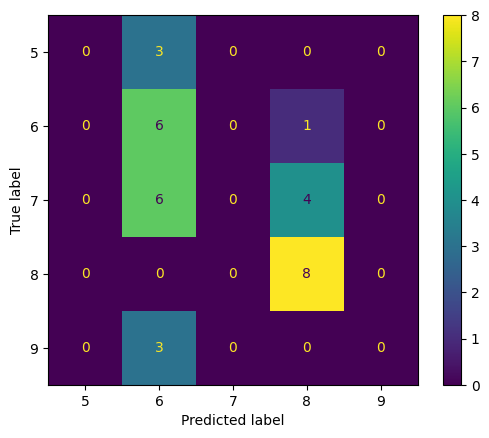

In [ ]:
conf_matrix_display = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=['5', '6', '7', '8','9'])
conf_matrix_display.plot()
plt.show()

Explain
* โมเดลทำนาย Quality of Sleepระดับที่ 5 ถูกต้องทั้งหมด 0 คน และ โมเดลทำนายไม่ถูกต้อง 3 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 6 ถูกต้องทั้งหมด 6 คน และ โมเดลทำนายไม่ถูกต้อง 1 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 7 ถูกต้องทั้งหมด 0 คน และ โมเดลทำนายไม่ถูกต้อง 10 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 8 ถูกต้องทั้งหมด 8 คน และ โมเดลทำนายไม่ถูกต้อง 0 คน
* โมเดลทำนาย Quality of Sleepระดับที่ 9 ถูกต้องทั้งหมด 0 คน และ โมเดลทำนายไม่ถูกต้อง 3 คน

# Conclusion

* เนื่องจากมีค่า Accuracy ของ Random forest Model เท่ากับ 0.9355 ซึ่งมีค่ามากกว่า Accuracy ของ Decision Tree Model และ Accuracy ของ Support Vector Machine Model(SVM) อีกทั้ง Random Forest Model มีการทำนายค่าผิดน้อยกว่า Decision Tree Model และ Support Vector Model เพราะฉะนั้นการเลือกใช้ Random forest Model ในการทำนายจะทำให้ได้ผลลัพธ์ที่มีประสิทธิภาพมากกว่า



---



# Linear Regression
การถดถอยเชิงเส้นเป็นเทคนิคทางสถิติที่ใช้ในการสร้างแบบจำลองความสัมพันธ์ระหว่างตัวแปรต้น (Independent Variable) และตัวแปรตาม (Dependent Variable) โดยมีวัตถุประสงค์หลักในการพยายามคาดการณ์ค่าของตัวแปรตามโดยอาศัยค่าของตัวแปรต้น

วัตถุประสงค์ของการถดถอยเชิงเส้น (Linear Regression) คือ:

* ทำการคาดการณ์: คาดการณ์ค่าของตัวแปรตาม (เช่น การคาดการณ์ราคาบ้านจากพื้นที่บ้าน หรือการคาดการณ์ระดับคอเลสเตอรอลจากข้อมูลสุขภาพอื่น ๆ)
โดยใช้สมการเส้นตรง 𝑦 = 𝑚𝑥 + 𝑐 ที่คำนวณจากข้อมูลในอดีต
* วิเคราะห์ความสัมพันธ์: ศึกษาความสัมพันธ์ระหว่างตัวแปรต้นและตัวแปรตาม เพื่อดูว่าตัวแปรต้นมีผลอย่างไรต่อตัวแปรตาม เช่น ความสัมพันธ์ระหว่างอายุและระดับความดันโลหิต
* ทำความเข้าใจข้อมูล: ช่วยให้เราทำความเข้าใจแนวโน้ม (Trend) และรูปแบบของข้อมูล
* ดังนั้น การถดถอยเชิงเส้นใช้เพื่อคาดการณ์และวิเคราะห์ความสัมพันธ์ระหว่างตัวแปรในลักษณะที่เรียบง่าย โดยสมมติว่าความสัมพันธ์ระหว่างตัวแปรเป็นเส้นตรง

In [ ]:
# We will predict 'Quality of Sleep' based on other features.
X = df_sleepclean.drop('Quality of Sleep', axis=1)
y = df_sleepclean['Quality of Sleep']

In [ ]:
X

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,1,6.1,42,6,2,77.0,4200,0
1,0,28,2,6.2,60,8,1,75.0,10000,0
5,0,28,1,5.9,30,8,3,85.0,3000,2
6,0,29,4,6.3,40,7,3,82.0,3500,2
10,0,29,2,6.1,30,8,1,70.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
362,1,59,6,8.2,75,3,2,68.0,7000,1
364,1,59,5,8.0,75,3,2,68.0,7000,1
365,1,59,6,8.0,75,3,2,68.0,7000,1
366,1,59,5,8.1,75,3,2,68.0,7000,1


In [ ]:
y


,Quality of Sleep
0,6
1,6
5,4
6,6
10,6
...,...
362,9
364,9
365,9
366,9


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
203,0,43,6,6.9,47,7,1,69.0,6800,0
145,1,38,9,7.4,60,5,3,84.0,3300,1
49,0,31,5,7.7,75,6,1,70.0,8000,1
86,0,35,6,7.2,60,4,1,65.0,5000,0
157,0,39,9,7.3,60,5,1,68.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
148,1,39,9,6.9,50,6,1,75.0,5500,0
249,0,44,10,6.5,45,7,2,72.0,6000,0
30,1,30,5,6.4,35,7,1,78.0,4100,1
196,0,43,10,6.8,45,7,2,72.0,6000,2


In [ ]:
y_train

,Quality of Sleep
203,6
145,7
49,7
86,8
157,8
...,...
148,7
249,6
30,5
196,6


In [ ]:
X_test

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
177,0,42,10,6.5,45,7,2,72.0,6000,2
184,1,42,4,6.8,45,7,2,78.0,5000,1
209,0,43,6,7.8,90,5,1,70.0,8000,0
261,1,45,4,7.2,45,4,2,65.0,6000,0
67,0,33,2,6.0,30,8,1,72.0,5000,2
260,1,45,6,7.1,45,4,2,65.0,6000,2
163,0,40,9,7.9,90,5,1,68.0,8000,0
167,0,41,9,7.1,55,6,2,72.0,6000,0
34,0,31,2,7.7,75,6,1,70.0,8000,0
31,1,30,5,6.4,35,7,1,78.0,4100,2


In [ ]:
y_test

,Quality of Sleep
177,6
184,6
209,8
261,7
67,6
260,7
163,8
167,7
34,7
31,5


In [ ]:
#  Train the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

6.695801112446117


In [ ]:
lm.coef_

array([-2.25468973e-01,  3.57615779e-02,  1.05430905e-02,  3.31692769e-01,
        4.74324253e-03, -3.91798876e-01, -3.66815308e-01, -1.28603468e-02,
        2.34098192e-05, -1.42176549e-01])

In [ ]:
X_train.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [ ]:
lm_coeff = pd.DataFrame(lm.coef_.reshape(10,1), X.columns,columns=['coeff'])

In [ ]:
lm_coeff

,coeff
Gender,-0.225469
Age,0.035762
Occupation,0.010543
Sleep Duration,0.331693
Physical Activity Level,0.004743
Stress Level,-0.391799
BMI Category,-0.366815
Heart Rate,-0.012860
Daily Steps,0.000023
Sleep Disorder,-0.142177


In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
y_pred

array([6.1266053 , 5.97899026, 8.27214752, 7.72711961, 5.43501797,
       7.43068342, 8.25538203, 7.00290069, 7.30471943, 5.58385481,
       7.3363487 , 7.30212713, 5.57691705, 6.93994567, 7.88077359,
       7.56078514, 7.23166776, 9.12955474, 7.89804128, 8.23897824,
       7.81196896, 8.12169906, 5.75254034, 7.77620738, 5.92287821,
       6.09541   , 7.34048101, 6.05647979, 8.77886309, 5.70574796,
       7.37642796])

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse

0.15109778763599627

In [ ]:
r2

0.8797972070213639

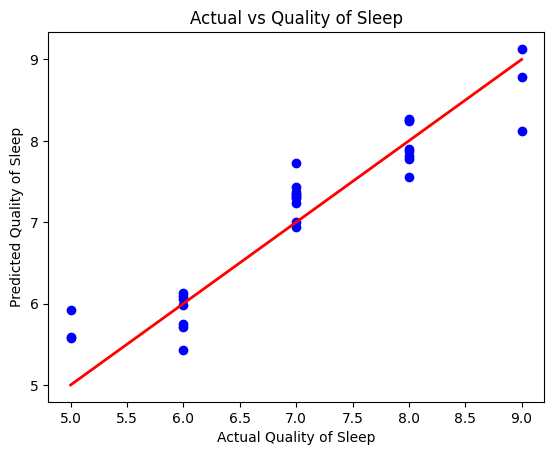

In [ ]:
# Visualize actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Quality of Sleep')
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.show()

เมื่อดูจากจุดต่างๆ เมื่อเทียบกับเส้นทแยงมุม 45 องศา จะเห็นว่า จุดต่างๆส่วนใหญ่อยู่ไกล้กับเส้นทแยงมุมตรง แสดงว่า โมเดลมีการคาดการณ์ ค่า Quality of sleep ที่ดี

# Polynomial Regression

In [ ]:
# We will predict 'Stress Level' based on other features.
X = df_sleepclean.drop('Quality of Sleep', axis=1)
y = df_sleepclean['Quality of Sleep']

In [ ]:
X

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,1,6.1,42,6,2,77.0,4200,0
1,0,28,2,6.2,60,8,1,75.0,10000,0
5,0,28,1,5.9,30,8,3,85.0,3000,2
6,0,29,4,6.3,40,7,3,82.0,3500,2
10,0,29,2,6.1,30,8,1,70.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
362,1,59,6,8.2,75,3,2,68.0,7000,1
364,1,59,5,8.0,75,3,2,68.0,7000,1
365,1,59,6,8.0,75,3,2,68.0,7000,1
366,1,59,5,8.1,75,3,2,68.0,7000,1


In [ ]:
y

,Quality of Sleep
0,6
1,6
5,4
6,6
10,6
...,...
362,9
364,9
365,9
366,9


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
203,0,43,6,6.9,47,7,1,69.0,6800,0
145,1,38,9,7.4,60,5,3,84.0,3300,1
49,0,31,5,7.7,75,6,1,70.0,8000,1
86,0,35,6,7.2,60,4,1,65.0,5000,0
157,0,39,9,7.3,60,5,1,68.0,8000,0
...,...,...,...,...,...,...,...,...,...,...
148,1,39,9,6.9,50,6,1,75.0,5500,0
249,0,44,10,6.5,45,7,2,72.0,6000,0
30,1,30,5,6.4,35,7,1,78.0,4100,1
196,0,43,10,6.8,45,7,2,72.0,6000,2


In [ ]:
y_train

,Quality of Sleep
203,6
145,7
49,7
86,8
157,8
...,...
148,7
249,6
30,5
196,6


In [ ]:
 X_test

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
177,0,42,10,6.5,45,7,2,72.0,6000,2
184,1,42,4,6.8,45,7,2,78.0,5000,1
209,0,43,6,7.8,90,5,1,70.0,8000,0
261,1,45,4,7.2,45,4,2,65.0,6000,0
67,0,33,2,6.0,30,8,1,72.0,5000,2
260,1,45,6,7.1,45,4,2,65.0,6000,2
163,0,40,9,7.9,90,5,1,68.0,8000,0
167,0,41,9,7.1,55,6,2,72.0,6000,0
34,0,31,2,7.7,75,6,1,70.0,8000,0
31,1,30,5,6.4,35,7,1,78.0,4100,2


In [ ]:
y_test

,Quality of Sleep
177,6
184,6
209,8
261,7
67,6
260,7
163,8
167,7
34,7
31,5


Polynomial Regression - Mean Squared Error: 1.2456601349005136
Polynomial Regression - R-squared: 0.00904024036474016


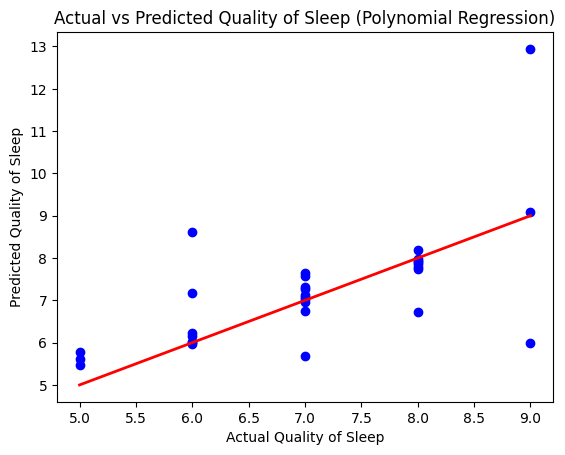

In [ ]:
# prompt: how to train model Polynomial Regression:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# Train the linear regression model on polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - Mean Squared Error: {mse_poly}")
print(f"Polynomial Regression - R-squared: {r2_poly}")


# Visualize actual vs predicted values (optional)
plt.scatter(y_test, y_pred_poly, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Quality of Sleep (Polynomial Regression)')
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.show()

# Logistic Regression Model

In [ ]:
features = ['Age', 'Stress Level', 'Physical Activity Level', 'Sleep Duration']
X = df_sleep[features]

In [ ]:
df_sleep.dropna(inplace=True)

In [ ]:
df_sleep['Gender'] = df_sleep['Gender'].map({'Male': 0, 'Female': 1})


In [ ]:
X = df_sleep[['Age', 'Gender', 'Sleep Duration', 'Stress Level', 'Physical Activity Level']]
y = df_sleep['Sleep Disorder'].map({'Nothing': 0, 'Insomnia': 1, 'Sleep Apnea': 2})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,Gender,Sleep Duration,Stress Level,Physical Activity Level
154,39,NaN,7.0,5,60
368,59,NaN,8.1,3,75
266,48,NaN,7.3,5,65
363,59,NaN,8.2,3,75
264,48,NaN,7.3,5,65
...,...,...,...,...,...
220,44,NaN,6.6,4,45
85,35,NaN,7.2,4,60
128,38,NaN,7.3,5,60
314,52,NaN,8.4,3,30


In [ ]:
X_test

,Age,Gender,Sleep Duration,Stress Level,Physical Activity Level
189,43,NaN,6.5,7,45
262,45,NaN,6.2,4,45
33,31,NaN,6.1,8,30
77,33,NaN,5.7,8,30
14,29,NaN,6.0,8,30
...,...,...,...,...,...
136,38,NaN,7.1,4,60
242,44,NaN,6.4,7,45
170,41,NaN,7.7,5,90
360,59,NaN,8.2,3,75


In [ ]:
y_train

,Sleep Disorder
154,NaN
368,NaN
266,NaN
363,NaN
264,NaN
...,...
220,NaN
85,NaN
128,NaN
314,NaN


In [ ]:
y_test

,Sleep Disorder
189,NaN
262,NaN
33,NaN
77,NaN
14,NaN
...,...
136,NaN
242,NaN
170,NaN
360,NaN


In [ ]:
imputer = SimpleImputer(strategy='mean')  # หรือ 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
print(np.isnan(X_train).sum())
print(np.isinf(X_train).sum())

0
0


In [ ]:
#print(np.isnan(X_train).sum())  # ตรวจสอบจำนวน NaN ใน X_train
#print(np.isinf(X_train).sum())


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score:
Accuracy: 1.00


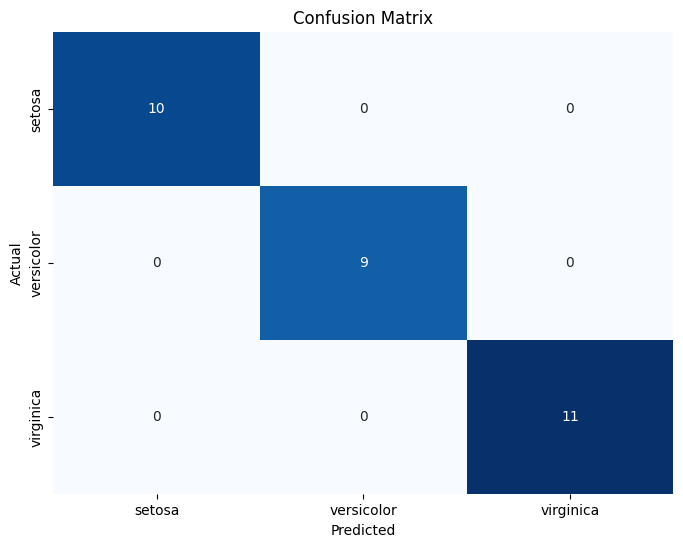

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print(class_report)

print("\nAccuracy Score:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

